Nilesh Misra
PCA

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
acoustic=pd.read_csv('/content/drive/MyDrive/Technocolab/dataset /one.csv')
# acoustic.head()

In [ ]:
user_behaviour=pd.read_csv('/content/drive/MyDrive/Technocolab/dataset /two.csv')
# user_behaviour.head()

In [ ]:
user_behaviour = user_behaviour.rename(columns={'track_id_clean': 'track_id'})
# user_behaviour.head()

In [ ]:
df = pd.merge(acoustic, user_behaviour, on='track_id')
df.shape

(167880, 50)

In [ ]:
df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,0_0e4a49d8-688d-4958-94db-5cb56adc3090,10,10,False,False,False,False,0,1,0,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,0_0cc4863b-83ff-48cb-afda-f952ad323562,8,11,False,False,False,True,0,1,0,0,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,0_0cc4863b-83ff-48cb-afda-f952ad323562,10,11,True,True,True,False,0,1,0,0,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,0_061d77c2-5526-43b2-993c-adf4338897ce,6,10,False,False,False,True,0,0,1,1,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,0_091c94f6-e76b-4b3e-8366-5d9d3c3e2fef,2,20,False,False,True,False,0,0,1,1,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay


In [ ]:
df.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,215.893484,2013.368614,99.744583,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,60.223626,9.740043,0.892779,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.503403,2015.000000,99.913831,0.030579,0.434064,0.451872,0.562350,7.224558,0.513711,0.989104,3.701751e-09,1.000000,0.099943,-8.232000,0.452991,0.205129,0.044635,97.004997,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,212.027023,2017.000000,99.988785,0.115362,0.550788,0.594088,0.687427,8.965730,0.630788,1.013991,5.221813e-07,5.000000,0.125049,-6.506000,0.639286,0.305746,0.086432,123.935997,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,240.800003,2018.000000,99.998715,0.336899,0.665993,0.724430,0.786602,10.764786,0.760826,1.033737,9.802441e-05,8.000000,0.235885,-5.083000,0.757812,0.470098,0.206128,144.072998,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [ ]:
df=df.drop(['skip_1', 'skip_3','not_skipped','date','track_id','session_id'], axis=1)

In [ ]:

boolean_fields=['hist_user_behavior_is_shuffle','premium']
for i in boolean_fields:
  data = list(df[i])
  values = np.array(data)
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  # print(onehot_encoded)
  df.drop([str(i)],axis=1)
  df[str(i)]=onehot_encoded
  # df = pd.concat(df, pd.DataFrame(onehot_encoded))
df.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,10,10,False,0,1,0,0,0,0,0.0,10,0.0,user_collection,trackdone,trackdone
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,8,11,False,0,1,0,0,0,0,1.0,23,0.0,radio,trackdone,trackdone
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,10,11,True,0,1,0,0,0,0,1.0,23,0.0,radio,backbtn,fwdbtn
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,6,10,False,0,0,1,1,0,0,1.0,22,0.0,user_collection,trackdone,trackdone
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,2,20,False,0,0,1,1,0,0,1.0,20,0.0,catalog,trackdone,endplay


In [ ]:
# Checking Categorical values
categorical_fields = df.select_dtypes(include='O').keys()
categorical_fields

Index(['mode', 'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end'],
      dtype='object')

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['mode','context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'])
one_hot_encoded_data=one_hot_encoded_data.drop(['skip_2'],axis=1)
one_hot_encoded_data.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,mode_major,mode_minor,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,10,10,0,1,0,0,0,0,0.0,10,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,8,11,0,1,0,0,0,0,1.0,23,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,10,11,0,1,0,0,0,0,1.0,23,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,6,10,0,0,1,1,0,0,1.0,22,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,2,20,0,0,1,1,0,0,1.0,20,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
labels=df['skip_2']
labels.shape

(167880,)

In [ ]:
labels=labels.values.reshape(167880,1)

In [ ]:
# scalar = StandardScaler()
# scalar.fit(one_hot_encoded_data)
# scaled_data = scalar.transform(one_hot_encoded_data)

In [ ]:
one_hot_encoded_data['labels']=labels

In [ ]:
one_hot_encoded_data.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,mode_major,mode_minor,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,labels
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,10,10,0,1,0,0,0,0,0.0,10,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,False
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,8,11,0,1,0,0,0,0,1.0,23,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,False
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,10,11,0,1,0,0,0,0,1.0,23,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,True
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,6,10,0,0,1,1,0,0,1.0,22,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,False
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,2,20,0,0,1,1,0,0,1.0,20,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,False


In [ ]:
one_hot_encoded_data['labels'].replace(False, 'Not Skipped',inplace=True)
one_hot_encoded_data['labels'].replace(True, 'Skipped',inplace=True)
one_hot_encoded_data = one_hot_encoded_data.rename(columns={'labels': 'Prediction'})
one_hot_encoded_data.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,mode_major,mode_minor,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,Prediction
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,10,10,0,1,0,0,0,0,0.0,10,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Not Skipped
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,8,11,0,1,0,0,0,0,1.0,23,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Not Skipped
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,10,11,0,1,0,0,0,0,1.0,23,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Skipped
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,6,10,0,0,1,1,0,0,1.0,22,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Not Skipped
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,2,20,0,0,1,1,0,0,1.0,20,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,Not Skipped


In [ ]:
features=one_hot_encoded_data.columns
features

Index(['duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'organism', 'speechiness', 'tempo', 'time_signature',
       'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7',
       'session_position', 'session_length', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'mode_major', 'mode_minor',
       'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_

In [ ]:
features=np.array(['duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'organism', 'speechiness', 'tempo', 'time_signature',
       'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7',
       'session_position', 'session_length', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'mode_major', 'mode_minor',
       'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror',
       'hist_user_behavior_reason_end_backbtn',
       'hist_user_behavior_reason_end_clickrow',
       'hist_user_behavior_reason_end_endplay',
       'hist_user_behavior_reason_end_fwdbtn',
       'hist_user_behavior_reason_end_logout',
       'hist_user_behavior_reason_end_remote',
       'hist_user_behavior_reason_end_trackdone'],
      dtype='object')

In [ ]:
x = one_hot_encoded_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(x.T))

NumPy covariance matrix: 
[[ 1.00000596e+00 -1.66898361e-01 -2.77728400e-02 ...  3.25125852e-03
   4.47764860e-03 -6.17863536e-02]
 [-1.66898361e-01  1.00000596e+00  1.24614833e-01 ...  1.53069490e-04
   4.38626356e-04  6.02313692e-03]
 [-2.77728400e-02  1.24614833e-01  1.00000596e+00 ...  4.07542556e-04
  -1.65754205e-03  6.08739097e-03]
 ...
 [ 3.25125852e-03  1.53069490e-04  4.07542556e-04 ...  1.00000596e+00
  -2.31520009e-03 -4.19787021e-02]
 [ 4.47764860e-03  4.38626356e-04 -1.65754205e-03 ... -2.31520009e-03
   1.00000596e+00 -2.88832876e-02]
 [-6.17863536e-02  6.02313692e-03  6.08739097e-03 ... -4.19787021e-02
  -2.88832876e-02  1.00000596e+00]]


In [ ]:
cov_mat = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 7.54337676e-02  3.87141261e-02  1.30004148e-02 ... -8.85507479e-17
  -5.18111195e-17 -1.08005035e-17]
 [-1.69768968e-01  1.04115864e-01 -2.46790510e-03 ...  1.26673662e-16
  -1.42875035e-16 -1.78318187e-17]
 [-6.00343600e-02  3.25115747e-02  2.63144230e-03 ...  1.12939794e-16
  -1.57235456e-16 -8.03231610e-17]
 ...
 [ 1.19439833e-03  4.58885838e-04 -5.21554219e-02 ...  3.32815633e-03
   4.34177012e-04  5.70001977e-04]
 [ 6.18254680e-04  9.94672011e-04 -2.04574469e-02 ...  2.29397651e-03
   2.99262345e-04  3.92881528e-04]
 [ 1.53000449e-02 -1.73729453e-02 -1.48612179e-01 ...  2.73413887e-02
   3.56684040e-03  4.68266634e-03]]

Eigenvalues 
[ 6.68037243e+00  3.84096019e+00  3.09582239e+00  2.60868506e+00
  2.54149309e+00  2.16428209e+00  2.02460049e+00  1.91855605e+00
  1.75237611e+00  1.69247054e+00  1.50555741e+00  1.44899182e+00
  3.45029778e-02  1.16174781e-02  7.56712650e-03  8.20277029e-03
  4.77766830e-02  7.38981793e-02  1.01908711e-01  1.32832739e-01
  1.5943534

In [ ]:
# pca = PCA(n_components = 2)
# pca.fit(scaled_data)
# x_pca = pca.transform(scaled_data)

In [ ]:
# components
# pca.components_

In [ ]:
x.shape

(167880, 63)

In [ ]:
one_hot_encoded_data.shape

(167880, 64)

In [ ]:
np.mean(x)

-4.731301594607726e-17

In [ ]:
np.std(x)

0.9999999999999992

In [ ]:
feature_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal component 1', 'Principal component 2'])

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.cumsum()))


Explained variation per principal component: [6.68037243 3.84095963]
Explained variation per principal component: [0.10603703 0.06096725]
Explained variation per principal component: [0.10603703 0.16700428]


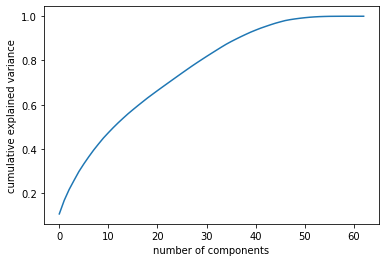

In [ ]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 40% of the variance, while you need around 50 components to describe close to 100% of the variance.

In [ ]:
finalDf = pd.concat([principalDf, one_hot_encoded_data[['Prediction']]], axis = 1)

In [ ]:
finalDf.head()

,Principal component 1,Principal component 2,Prediction
0,5.190245,3.506176,Not Skipped
1,4.990091,9.489865,Not Skipped
2,4.841303,9.362038,Skipped
3,4.426770,6.451079,Not Skipped
4,5.471274,3.322346,Not Skipped


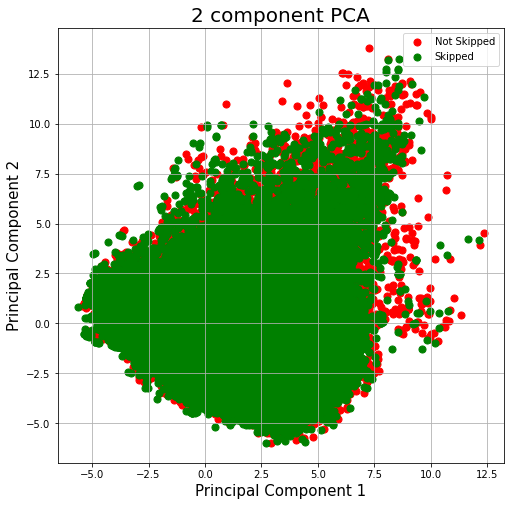

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Predictions = ['Not Skipped', 'Skipped']
colors = ['r', 'g']
for Prediction, color in zip(Predictions,colors):
    indicesToKeep = finalDf['Prediction'] == Prediction
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal component 1']
               , finalDf.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 50)
ax.legend(Predictions)
ax.grid()

In [ ]:
train_data, test_data, train_pred, test_pred = train_test_split(
    one_hot_encoded_data.loc[:, features].values, one_hot_encoded_data['Prediction'], test_size=1/7.0, random_state=0)

In [ ]:
train_data.shape

(143897, 63)

In [ ]:
test_data.shape

(23983, 63)

In [ ]:
train_pred.shape

(143897,)

In [ ]:
test_pred.shape

(23983,)

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
pca = PCA(.95)

In [ ]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# components
pca.components_

array([[ 7.55472357e-02, -1.69808763e-01, -5.94542812e-02, ...,
         1.54829005e-03,  4.92126629e-04,  1.45887366e-02],
       [-3.91572967e-02, -1.05748817e-01, -3.35900697e-02, ...,
        -7.12528856e-04,  1.21259850e-04,  1.53792895e-02],
       [-1.30265461e-02,  1.24591164e-03, -2.41538848e-03, ...,
         5.17966919e-02,  1.96287189e-02,  1.48289327e-01],
       ...,
       [-9.64330519e-02, -3.16475616e-01,  2.65576699e-02, ...,
        -8.53199700e-03,  1.25629840e-03, -1.01762256e-02],
       [ 8.65786913e-03, -4.88376531e-02, -1.19957196e-02, ...,
         5.30411468e-04,  1.27722823e-02,  2.11642331e-01],
       [-4.49916417e-02, -1.65146732e-01,  8.69969114e-02, ...,
         4.59783827e-03,  8.07073330e-04,  2.45831072e-03]])

In [ ]:
train_data=pca.transform(train_data)

In [ ]:
test_data = pca.transform(test_data)